In [1]:
import magicEye
import sys
import warnings

import polars     as pl  # polars==0.17.9
import pandas     as pd  # padas ==1.3.5
import numpy      as np  # numpy ==1.19.5

from magicEye.util             import dotdict
from magicEye.data             import data_codes
from magicEye.model            import param_grids, model_codes, estimators, get_models
from sklearn.model_selection   import train_test_split

In [6]:
warnings.filterwarnings("ignore")

In [5]:
# #for test
# models = get_models()
# mInfo_BASE = models["BASE"] 

# <span style="color:white"> 000. read Data </font></span>
----
<a id="readData"></a>
<div class="alert alert-info">
    <font size=6><strong>read Data</strong></font>
</div>

----
## <span style="color:Green"> 001. <font size=4> **loan_customer.csv**(file) >> **df** (polars.DataFrame) </span>

In [7]:
df = pl.from_pandas(pd.read_csv("./data/loan_customer.csv"))
# df = pl.read_parquet("/datasets/data/경진대회2023_lgo/loan_customer.p")

----
## <span style="color:Green"> 002. <font size=4> **tr** (train) / **te** (test) **split** </span>

In [8]:
tr, te = train_test_split(df,test_size=0.1,random_state=1234)

> * <font size=2.5><span style="background-color:#FFE6E6;color:crimson">90%. 21,600건  > **tr(train/valid)**</span> (80% train/20% valid) </font>
> * <font size=2.5><span style="background-color:#FFE6E6;color:crimson">10% . 2,400건  > **te(test)**</span></font><br><br>

# <span style="color:white"><font size=0.1> 100. EDA </font></span>
----
<div class="alert alert-info">
    <font size=6><strong>EDA</strong></font> 
</div>

----
## <span style="color:Green"> 101. <font size=4> **describe** -> basic statistics </span>

In [6]:
tr.describe()

shape: (9, 36)
┌────────────┬──────────┬────────────┬───────────┬───┬──────────┬──────────┬────────────┬──────────┐
│ describe   ┆ SK_ID_CU ┆ NAME_CONTR ┆ CODE_GEND ┆ … ┆ CB_SCORE ┆ CB_SCORE ┆ CB_SCORE_3 ┆ TARGET   │
│ ---        ┆ RR       ┆ ACT_TYPE   ┆ ER        ┆   ┆ _1       ┆ _2       ┆ ---        ┆ ---      │
│ str        ┆ ---      ┆ ---        ┆ ---       ┆   ┆ ---      ┆ ---      ┆ f64        ┆ f64      │
│            ┆ f64      ┆ str        ┆ str       ┆   ┆ f64      ┆ f64      ┆            ┆          │
╞════════════╪══════════╪════════════╪═══════════╪═══╪══════════╪══════════╪════════════╪══════════╡
│ count      ┆ 21600.0  ┆ 21600      ┆ 21600     ┆ … ┆ 21600.0  ┆ 21600.0  ┆ 21600.0    ┆ 21600.0  │
│ null_count ┆ 0.0      ┆ 0          ┆ 6387      ┆ … ┆ 5525.0   ┆ 7432.0   ┆ 6395.0     ┆ 0.0      │
│ mean       ┆ 277781.2 ┆ null       ┆ null      ┆ … ┆ 49.93917 ┆ 58.07106 ┆ 60.396123  ┆ 0.082963 │
│            ┆ 73796    ┆            ┆           ┆   ┆ 1        ┆          ┆            ┆          │
│ std        ┆ 102866.7 ┆ null       ┆ null      ┆ … ┆ 13.06600 ┆ 10.73835 ┆ 8.676622   ┆ 0.275833 │
│            ┆ 99644    ┆            ┆           ┆   ┆ 5        ┆ 2        ┆            ┆          │
│ min        ┆ 100002.0 ┆ Cash loans ┆ F         ┆ … ┆ 0.0      ┆ 0.0      ┆ 28.967147  ┆ 0.0      │
│ max        ┆ 456228.0 ┆ Revolving  ┆ XNA       ┆ … ┆ 99.87079 ┆ 98.98798 ┆ 100.0      ┆ 1.0      │
│            ┆          ┆ loans      ┆           ┆   ┆          ┆ 6        ┆            ┆          │
│ median     ┆ 277650.5 ┆ null       ┆ null      ┆ … ┆ 49.95908 ┆ 57.93429 ┆ 59.991444  ┆ 0.0      │
│            ┆          ┆            ┆           ┆   ┆ 1        ┆ 9        ┆            ┆          │
│ 25%        ┆ 188435.0 ┆ null       ┆ null      ┆ … ┆ 41.04415 ┆ 50.84431 ┆ 54.443483  ┆ 0.0      │
│            ┆          ┆            ┆           ┆   ┆ 8        ┆          ┆            ┆          │
│ 75%        ┆ 366738.0 ┆ null       ┆ null      ┆ … ┆ 58.90600 ┆ 65.18496 ┆ 66.133046  ┆ 0.0      │
│            ┆          ┆            ┆           ┆   ┆ 9        ┆ 6        ┆            ┆          │
└────────────┴──────────┴────────────┴───────────┴───┴──────────┴──────────┴────────────┴──────────┘

> * <font size=2.5><span style="color:darkblue">35 columns (dtype str, f64, i64)</span></font>
> * <font size=2.5><span style="background-color:#FFE6E6;color:crimson">"TARGET" **imbalanced** issue!</span> -> examine further</font>
> * <font size=2.5><span style="background-color:#FFE6E6;color:crimson">**null** column exists!</span> -> examine further </font>
> * <font size=2.5><span style="color:darkblue">"FLAG_MOBIL" have same value 1</span> -> useless column >> drop  </font><br>
>  <font size=2> - 모든 record가 같은값(1)을 갖고 있음 (정보를 가지고 있지않음 >> 삭제 대상)<br><br>


----
## <span style="color:Green"> 102. <font size=4> distribution of the **Target** (event) </span>

In [8]:
magicEye.eda.target_d(tr)

shape: (2, 3)
┌────────┬───────┬───────────┐
│ TARGET ┆ count ┆ %         │
│ ---    ┆ ---   ┆ ---       │
│ i64    ┆ u32   ┆ f64       │
╞════════╪═══════╪═══════════╡
│ 0      ┆ 19808 ┆ 91.703704 │
│ 1      ┆ 1792  ┆ 8.296296  │
└────────┴───────┴───────────┘

> * <font size=2.5><span style="background-color:#FFE6E6;color:crimson">**imbalanced class Issue!!**</span> -> we can weight the classes by the representation in the data to reflect this imbalance</font><br><br>


----
## <span style="color:Green"> 103. <font size=4> **null** columns (Missing Values)</span>

In [9]:
magicEye.eda.null_counts(tr,target_col = "TARGET")

shape: (11, 7)
┌───────────────────────────┬─────────┬───────┬──────┬──────────┬───────────────┬──────────────────┐
│ col                       ┆ dtype   ┆ count ┆ Null ┆ %(Null)  ┆ event on Null ┆ %(event on Null) │
│ ---                       ┆ ---     ┆ ---   ┆ ---  ┆ ---      ┆ ---           ┆ ---              │
│ str                       ┆ object  ┆ u32   ┆ u32  ┆ f64      ┆ i32           ┆ f64              │
╞═══════════════════════════╪═════════╪═══════╪══════╪══════════╪═══════════════╪══════════════════╡
│ CODE_GENDER               ┆ Utf8    ┆ 21600 ┆ 6387 ┆ 0.295694 ┆ 546           ┆ 0.085486         │
│ FLAG_OWN_REALTY           ┆ Utf8    ┆ 21600 ┆ 8637 ┆ 0.399861 ┆ 754           ┆ 0.087299         │
│ AMT_CREDIT                ┆ Float64 ┆ 21600 ┆ 6571 ┆ 0.304213 ┆ 549           ┆ 0.083549         │
│ REGION_POPULATION_RELATIV ┆ Float64 ┆ 21600 ┆ 6476 ┆ 0.299815 ┆ 563           ┆ 0.086936         │
│ E                         ┆         ┆       ┆      ┆          ┆               ┆                  │
│ …                         ┆ …       ┆ …     ┆ …    ┆ …        ┆ …             ┆ …                │
│ DAYS_ID_PUBLISH           ┆ Float64 ┆ 21600 ┆ 4277 ┆ 0.198009 ┆ 361           ┆ 0.084405         │
│ CB_SCORE_1                ┆ Float64 ┆ 21600 ┆ 5525 ┆ 0.255787 ┆ 501           ┆ 0.090679         │
│ CB_SCORE_2                ┆ Float64 ┆ 21600 ┆ 7432 ┆ 0.344074 ┆ 609           ┆ 0.081943         │
│ CB_SCORE_3                ┆ Float64 ┆ 21600 ┆ 6395 ┆ 0.296065 ┆ 494           ┆ 0.077248         │
└───────────────────────────┴─────────┴───────┴──────┴──────────┴───────────────┴──────────────────┘

> * <font size=2.5><span style="background-color:#FFE6E6;color:crimson">**11 columns have null value**</span> -> will replace with some value(impute) or drop records</font><br><br>

----
## <span style="color:Green"> 104. <font size=4> **dtype** of columns</span>

In [10]:
magicEye.eda.count_dtype(tr)

shape: (3, 3)
┌─────────┬───────┬───────────────────────────────────┐
│ dtype   ┆ count ┆ columns                           │
│ ---     ┆ ---   ┆ ---                               │
│ object  ┆ u32   ┆ list[str]                         │
╞═════════╪═══════╪═══════════════════════════════════╡
│ Float64 ┆ 10    ┆ ["AMT_INCOME_TOTAL", "AMT_CREDIT… │
│ Utf8    ┆ 9     ┆ ["NAME_CONTRACT_TYPE", "CODE_GEN… │
│ Int64   ┆ 16    ┆ ["SK_ID_CURR", "CNT_CHILDREN", …… │
└─────────┴───────┴───────────────────────────────────┘

> * <font size=2.5>9 string(Utf8) columns -> <span style="background-color:#FFE6E6;color:crimson">**categorical features**</span>
> * <font size=2.5>26 Numerical(Int64,Float64) columns -> <span style="background-color:#FFE6E6;color:crimson">**numerical features**</span><br><br>

----
## <span style="color:Green"> 105. <font size=4> **distribution of categorical columns** (bar chart)</span>

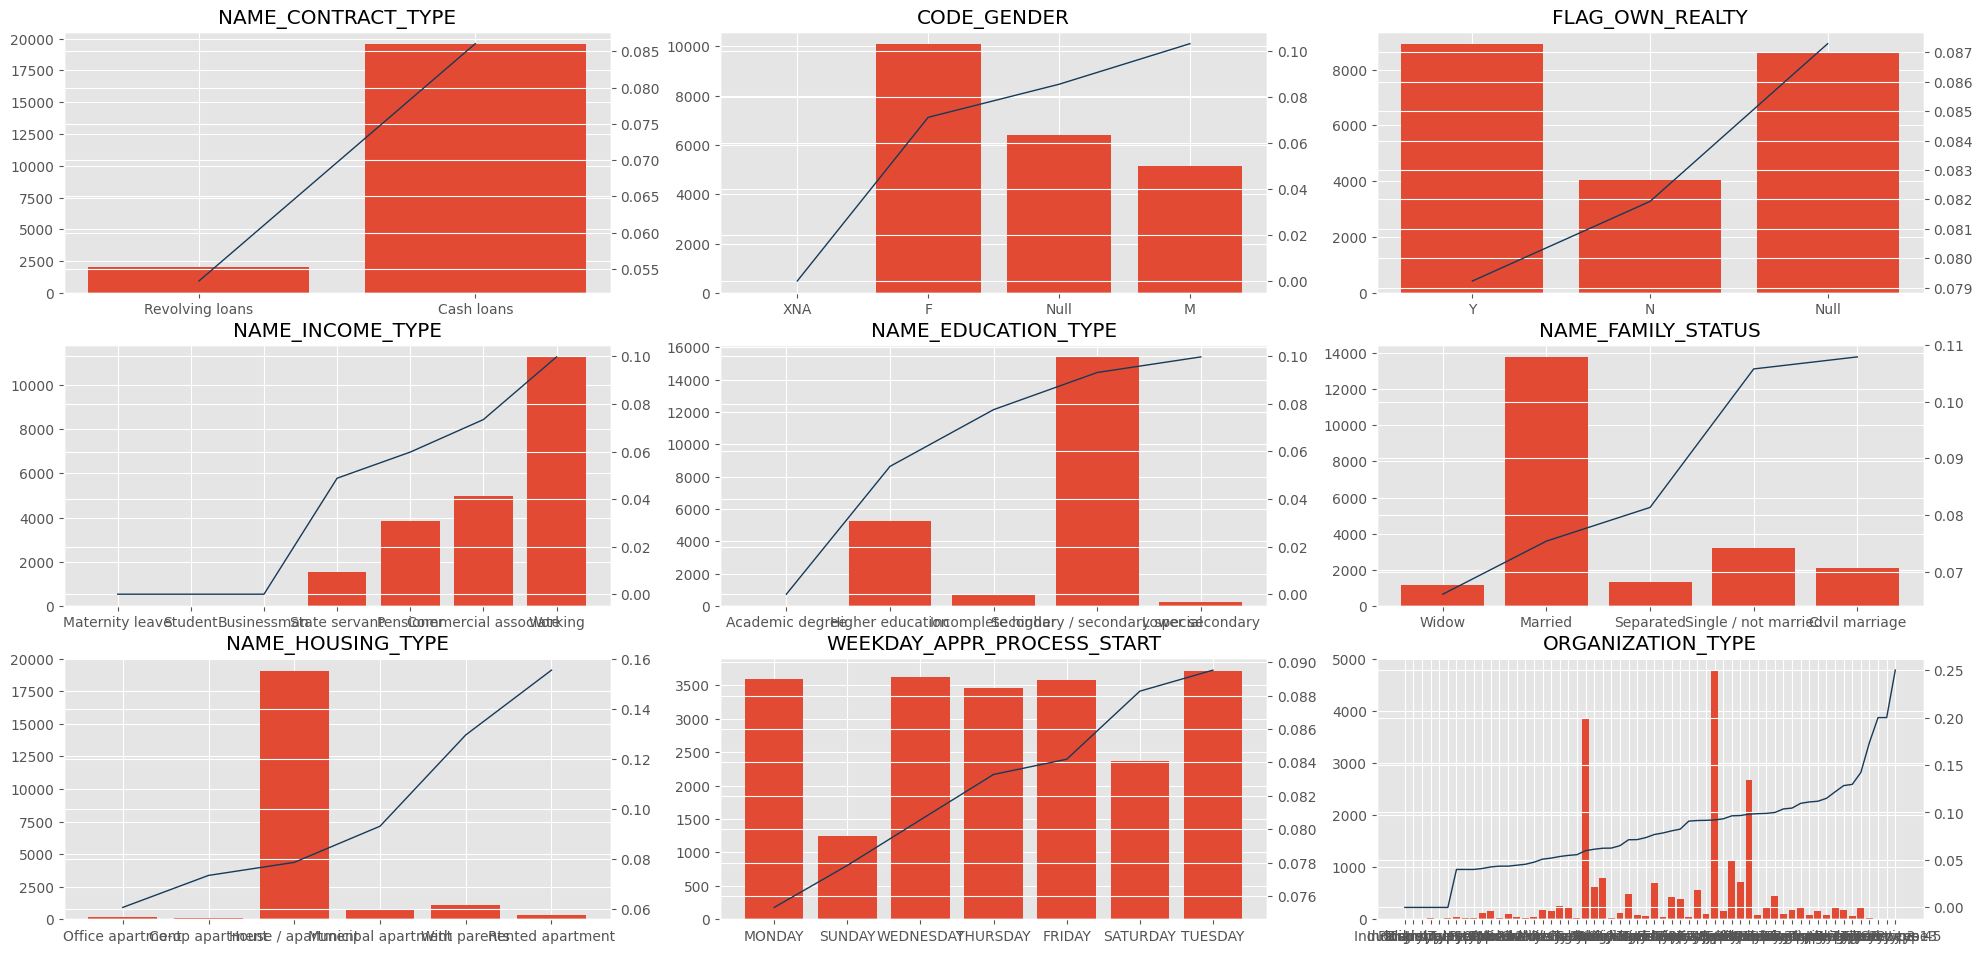

In [11]:
magicEye.eda.barAndLine(tr,target_col="TARGET",figsize=(24,40))

> * <font size=2.5> **all 9 categorical columns seems meaningful**
> * <font size=2.5><span style="background-color:#FFE6E6;color:crimson"> **ORGANIZATION_TYPE**</span> : 58가지 class 많음. numerical columns으로 전환을 고려해 볼수 있음
    <br><br>

----
## <span style="color:Green"> 106. <font size=4> **if** ORGANIZATION_TYPE is **numerical ?**</span>

----
## <span style="color:Green"> 107. <font size=4> **unique values** (categorical column)</span>

In [13]:
magicEye.eda.category(tr)

shape: (9, 4)
┌────────────────────────────┬──────────┬───────────────────────────────────┬───────────┐
│ col                        ┆ n_unique ┆ category                          ┆ have_null │
│ ---                        ┆ ---      ┆ ---                               ┆ ---       │
│ str                        ┆ i64      ┆ list[str]                         ┆ bool      │
╞════════════════════════════╪══════════╪═══════════════════════════════════╪═══════════╡
│ NAME_CONTRACT_TYPE         ┆ 2        ┆ ["Cash loans", "Revolving loans"… ┆ false     │
│ CODE_GENDER                ┆ 4        ┆ ["F", "M", "XNA"]                 ┆ true      │
│ FLAG_OWN_REALTY            ┆ 3        ┆ ["N", "Y"]                        ┆ true      │
│ NAME_INCOME_TYPE           ┆ 7        ┆ ["Businessman", "Commercial asso… ┆ false     │
│ NAME_EDUCATION_TYPE        ┆ 5        ┆ ["Academic degree", "Higher educ… ┆ false     │
│ NAME_FAMILY_STATUS         ┆ 5        ┆ ["Civil marriage", "Married", … … ┆ false     │
│ NAME_HOUSING_TYPE          ┆ 6        ┆ ["Co-op apartment", "House / apa… ┆ false     │
│ WEEKDAY_APPR_PROCESS_START ┆ 7        ┆ ["FRIDAY", "MONDAY", … "WEDNESDA… ┆ false     │
│ ORGANIZATION_TYPE          ┆ 58       ┆ ["Advertising", "Agriculture", …… ┆ false     │
└────────────────────────────┴──────────┴───────────────────────────────────┴───────────┘

> * <font size=2.5><span style="background-color:#FFE6E6;color:crimson">**convert to numerical value**</span> ->  (Label encoding / One-hot encoding)</font><br><br>

----
### <span style="color:Green"> 107.<font size=2.5>1.  **CODE_GENDER** </span>

In [14]:
magicEye.eda.count_category(tr,"CODE_GENDER")

shape: (4, 2)
┌─────────────┬───────┐
│ CODE_GENDER ┆ count │
│ ---         ┆ ---   │
│ str         ┆ u32   │
╞═════════════╪═══════╡
│ F           ┆ 10082 │
│ null        ┆ 6387  │
│ M           ┆ 5130  │
│ XNA         ┆ 1     │
└─────────────┴───────┘

> * <font size=2.5><span style="background-color:#FFE6E6;color:crimson">**"remove XNA**</span> -> Null </font><br><br>
> * <font size=2.5><span style="background-color:#FFE6E6;color:crimson">**"Null**</span> -> impute (estimate) </font><br><br>

----
### <span style="color:Green"> 107.<font size=2.5>2.  **FLAG_OWN_REALTY** </span>

In [15]:
magicEye.eda.count_category(tr,"FLAG_OWN_REALTY")

shape: (3, 2)
┌─────────────────┬───────┐
│ FLAG_OWN_REALTY ┆ count │
│ ---             ┆ ---   │
│ str             ┆ u32   │
╞═════════════════╪═══════╡
│ Y               ┆ 8911  │
│ null            ┆ 8637  │
│ N               ┆ 4052  │
└─────────────────┴───────┘

> * <font size=2.5><span style="background-color:#FFE6E6;color:crimson">**"remove XNA**</span> -> Null </font><br><br>
> * <font size=2.5><span style="background-color:#FFE6E6;color:crimson">**"Null**</span> -> impute (estimate) </font><br><br>

----
## <span style="color:Green"> 108. <font size=4> **distribution of numerical columns** (histogram)</span>

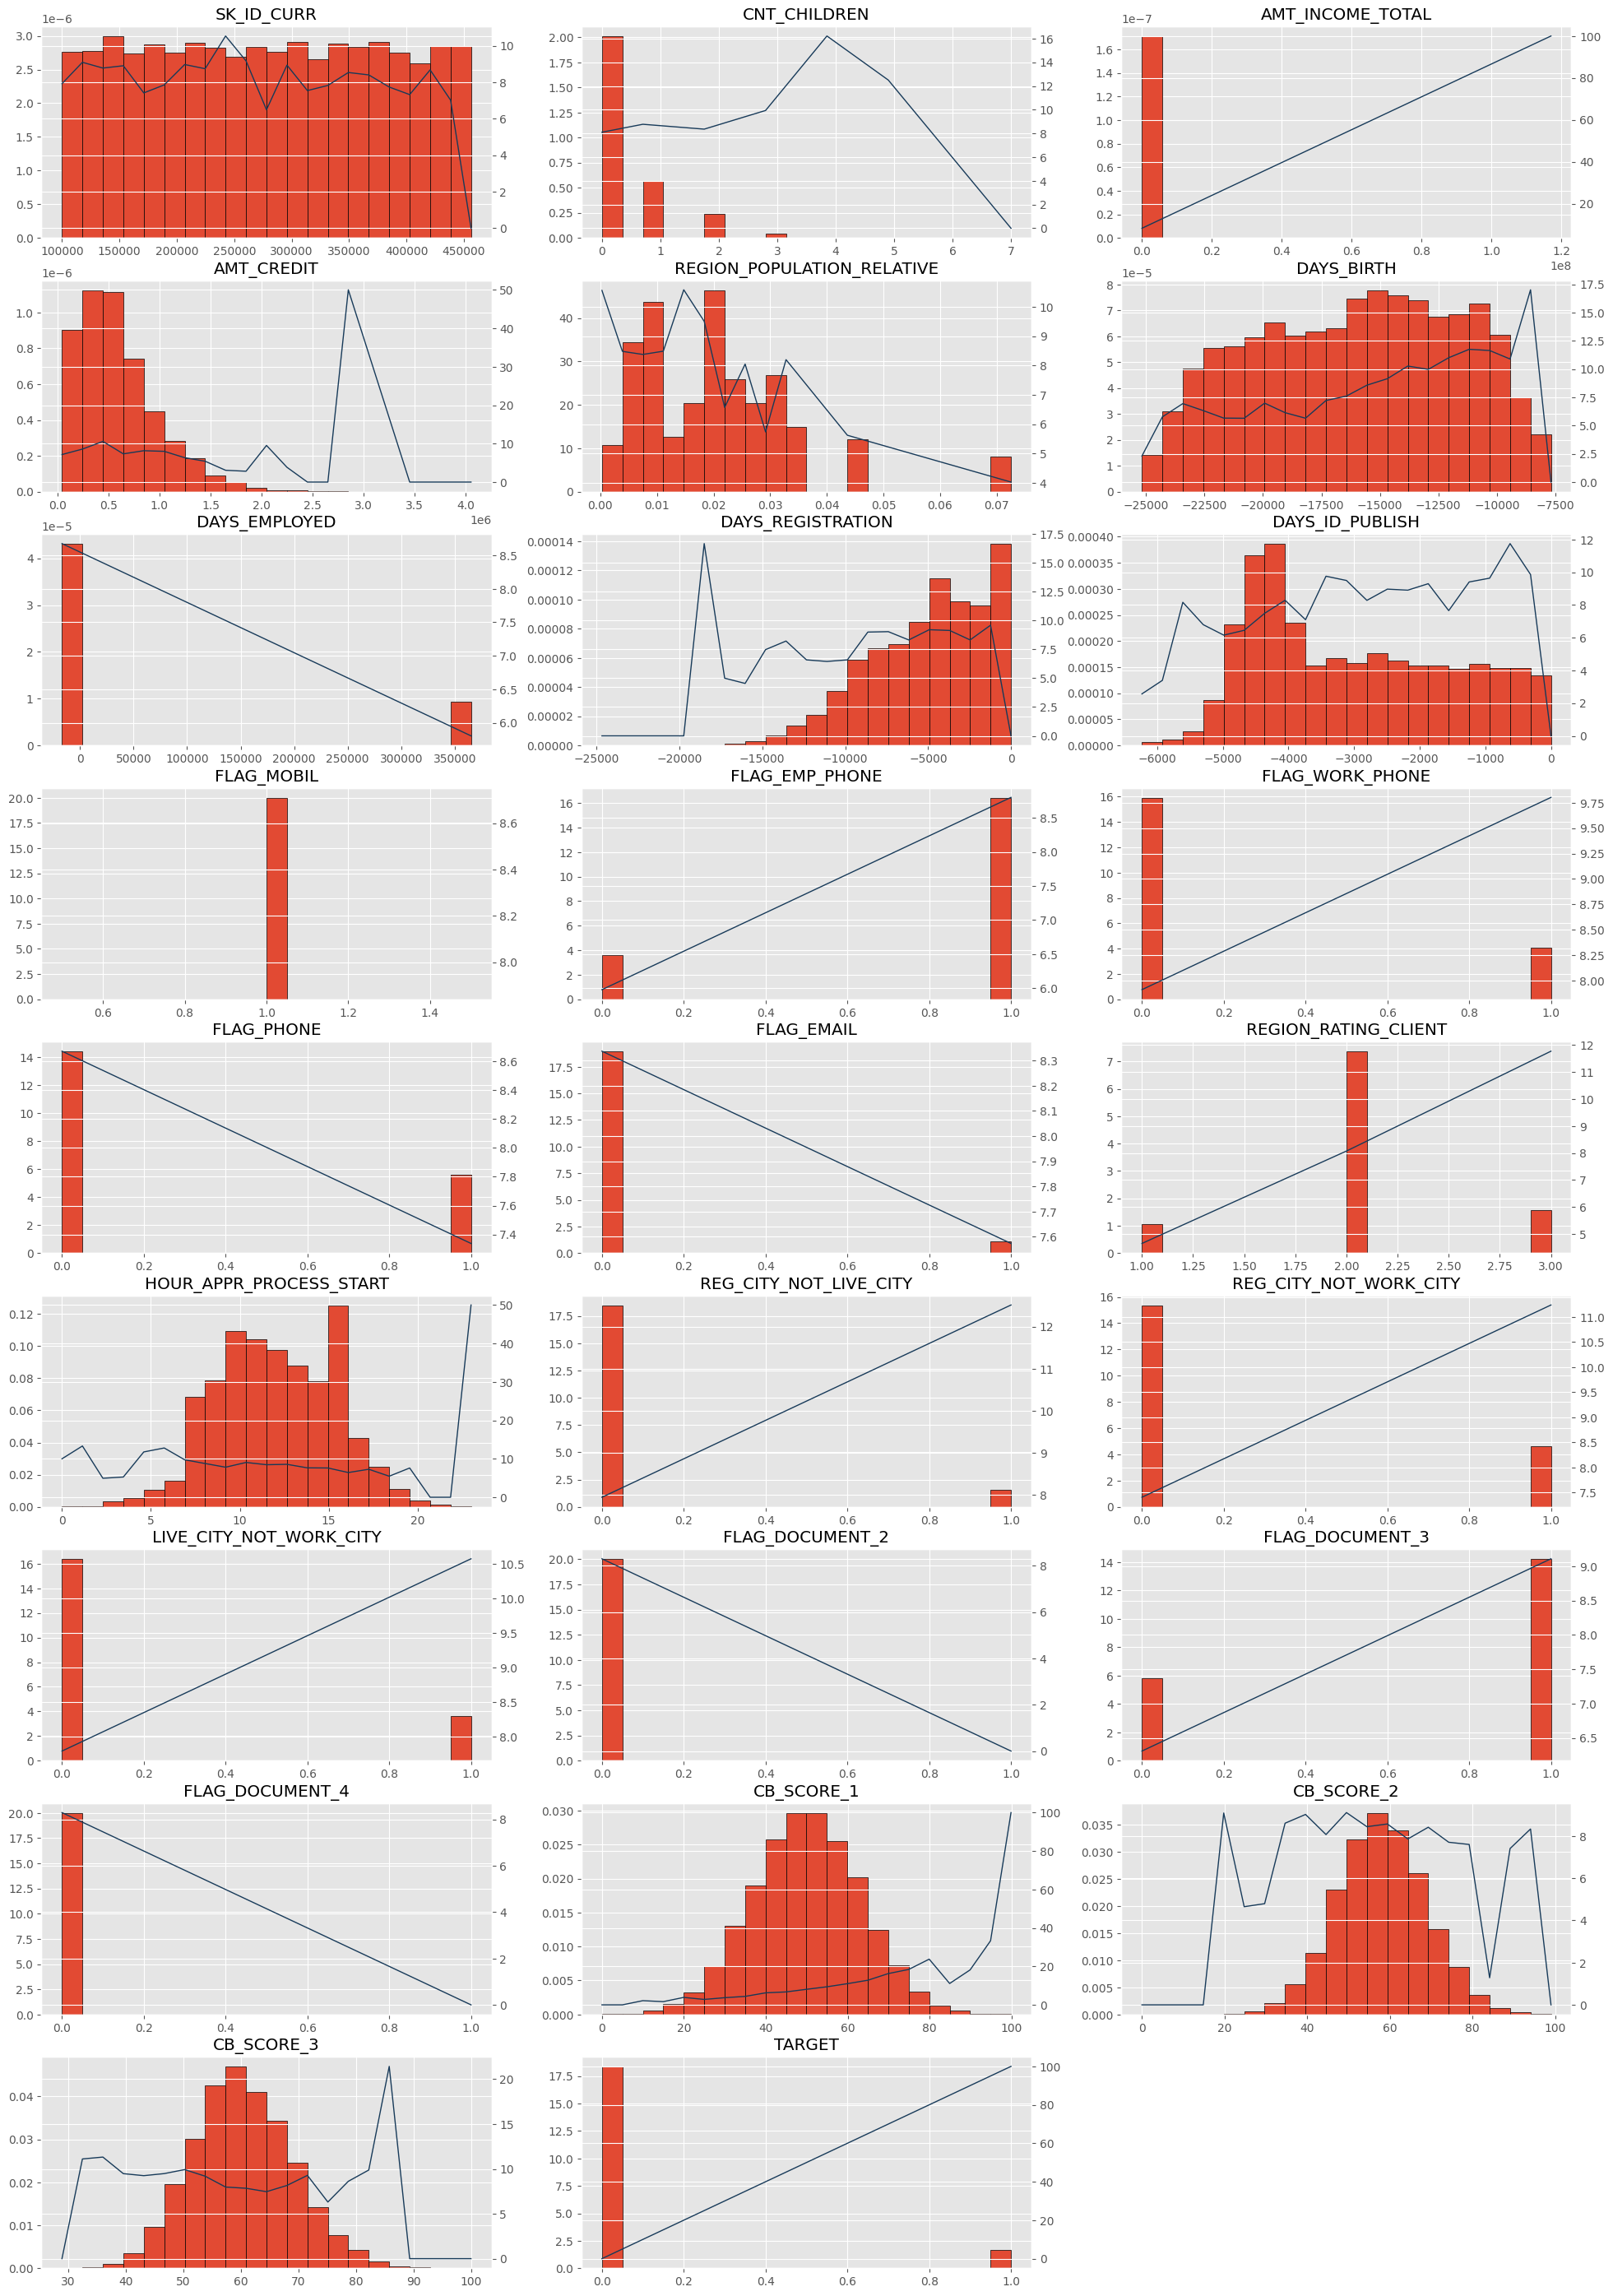

In [16]:
magicEye.eda.plot_numerical_d(tr,target_col="TARGET",figsize=(24,400))

> * <font size=2.5><span style="background-color:#FFE6E6;color:crimson">**anormalies issue (Outlier)**</span> : AMT_TOTAL_INCOME, DAYS_EMPLOYED, AMT_CREDIT, REGION_POPULATION_RELATIVE)</font>
> * <font size=2.5><span style="background-color:#FFE6E6;color:crimson">**useless column**</span> : SK_ID_CURR, FLAG_MOBIL</font><br><br>

----
## <span style="color:Green"> 109. <font size=4> **Null** in numerical colmuns</span>

In [17]:
magicEye.eda.null_counts(tr,"numerical")

shape: (9, 7)
┌───────────────────────────┬─────────┬───────┬──────┬──────────┬───────────────┬──────────────────┐
│ col                       ┆ dtype   ┆ count ┆ Null ┆ %(Null)  ┆ event on Null ┆ %(event on Null) │
│ ---                       ┆ ---     ┆ ---   ┆ ---  ┆ ---      ┆ ---           ┆ ---              │
│ str                       ┆ object  ┆ u32   ┆ u32  ┆ f64      ┆ i32           ┆ f64              │
╞═══════════════════════════╪═════════╪═══════╪══════╪══════════╪═══════════════╪══════════════════╡
│ AMT_CREDIT                ┆ Float64 ┆ 21600 ┆ 6571 ┆ 0.304213 ┆ 549           ┆ 0.083549         │
│ REGION_POPULATION_RELATIV ┆ Float64 ┆ 21600 ┆ 6476 ┆ 0.299815 ┆ 563           ┆ 0.086936         │
│ E                         ┆         ┆       ┆      ┆          ┆               ┆                  │
│ DAYS_BIRTH                ┆ Float64 ┆ 21600 ┆ 4273 ┆ 0.197824 ┆ 335           ┆ 0.078399         │
│ DAYS_EMPLOYED             ┆ Float64 ┆ 21600 ┆ 6452 ┆ 0.298704 ┆ 555           ┆ 0.08602          │
│ DAYS_REGISTRATION         ┆ Float64 ┆ 21600 ┆ 8784 ┆ 0.406667 ┆ 691           ┆ 0.078666         │
│ DAYS_ID_PUBLISH           ┆ Float64 ┆ 21600 ┆ 4277 ┆ 0.198009 ┆ 361           ┆ 0.084405         │
│ CB_SCORE_1                ┆ Float64 ┆ 21600 ┆ 5525 ┆ 0.255787 ┆ 501           ┆ 0.090679         │
│ CB_SCORE_2                ┆ Float64 ┆ 21600 ┆ 7432 ┆ 0.344074 ┆ 609           ┆ 0.081943         │
│ CB_SCORE_3                ┆ Float64 ┆ 21600 ┆ 6395 ┆ 0.296065 ┆ 494           ┆ 0.077248         │
└───────────────────────────┴─────────┴───────┴──────┴──────────┴───────────────┴──────────────────┘

> * <font size=2.5><span style="background-color:#FFE6E6;color:crimson">**Imputaion issue**</span> (replace null value) : AMT_TOTAL_INCOME, DAYS_EMPLOYED, AMT_CREDIT, REGION_POPULATION_RELATIVE)</font>
> * <font size=2.5><span style="background-color:#FFE6E6;color:crimson">**useless column**</span> : SK_ID_CURR, FLAG_MOBIL</font><br><br>

----
## <span style="color:Green"> 110. <font size=4> **Outlier Examine**</span>

----
### <span style="color:Green"> 110.<font size=2.5>1. **AMT_INCOME_TOTAL** (outlier examine)</span>

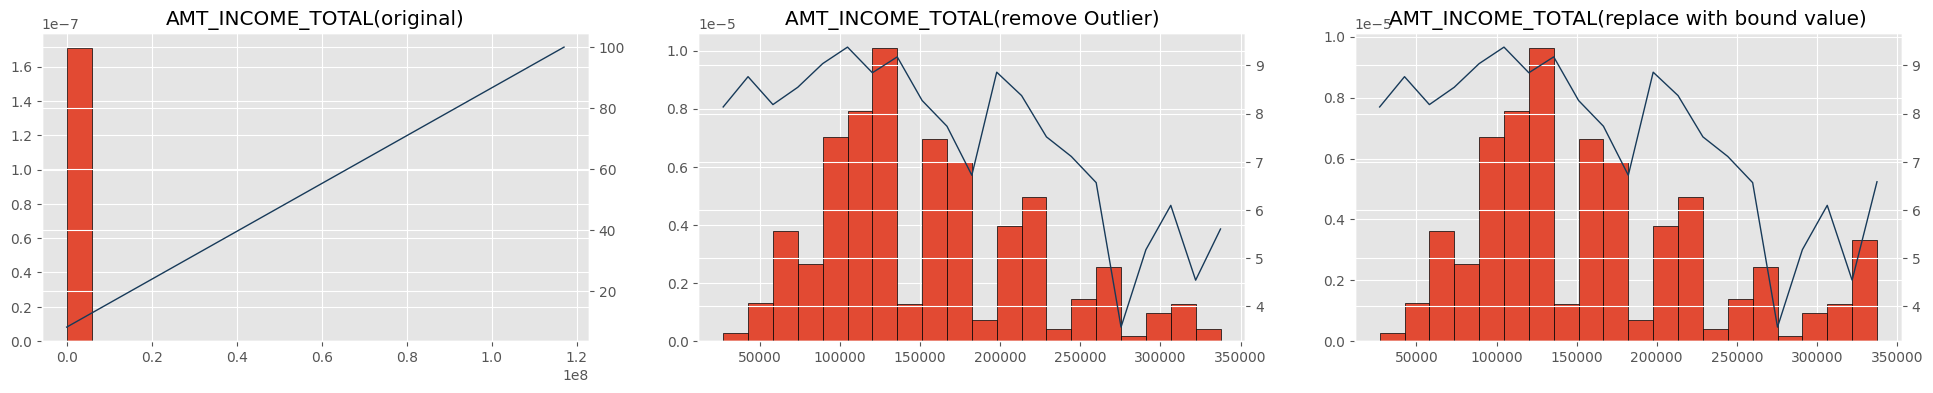

In [18]:
magicEye.eda.examineAnoralies(tr,"AMT_INCOME_TOTAL",bins=20,target_col="TARGET",figsize=(24,4))

> * <font size=2.5><span style="background-color:#FFE6E6;color:crimson">**remove anormalies issue**</span> replace with outlier bound value : **AMT_INCOME**</font><br><br>

----
### <span style="color:Green"> 110.<font size=2.5>2. **DAYS_EMPLOYED** (outlier examine)</span>

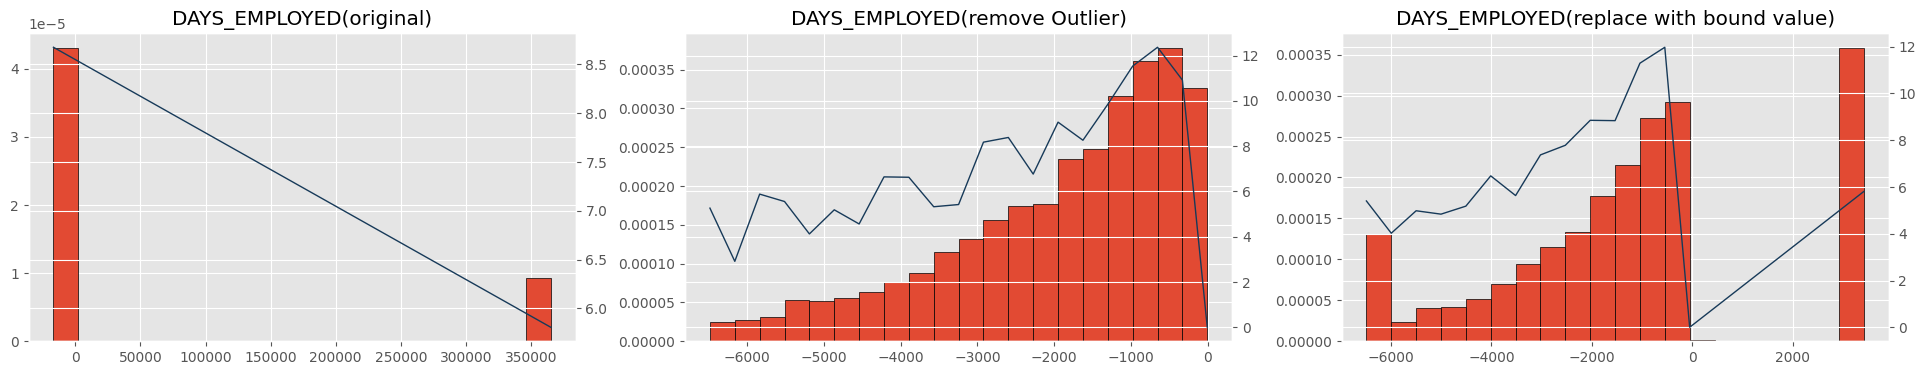

In [19]:
magicEye.eda.examineAnoralies(tr,"DAYS_EMPLOYED",bins=20,target_col="TARGET",figsize=(24,4))

> * <font size=2.5><span style="background-color:#FFE6E6;color:crimson">**another problem**</span> (not solved by replacement) : +,- days</font><br><br>

In [18]:
# tr.filter(pl.col("DAYS_EMPLOYED")>0)[["DAYS_EMPLOYED","TARGET"]].describe()[:6]

> * <font size=2.5><span style="background-color:#FFE6E6;color:crimson">**2,393** outliers **have same value 365,243 !!**</span> </font><br>
>   <font size=2.5>- low Percentage of event(TARGET)(5.5%) >> meaningful </font><br><br>
> * <font size=2.5><span style="background-color:#FFE6E6;color:crimson">**remove anormalies issue & find new information flag**</span></font><br>
>   <font size=2.5>- replace outlier with NUll </font><br>
>   <font size=2.5>- add new column : FLAG_DAYS_EMPLOYED </font><br><br>



----
### <span style="color:Green"> 110.<font size=2.5>3. **AMT_CREDIT** (outlier examine)</span>

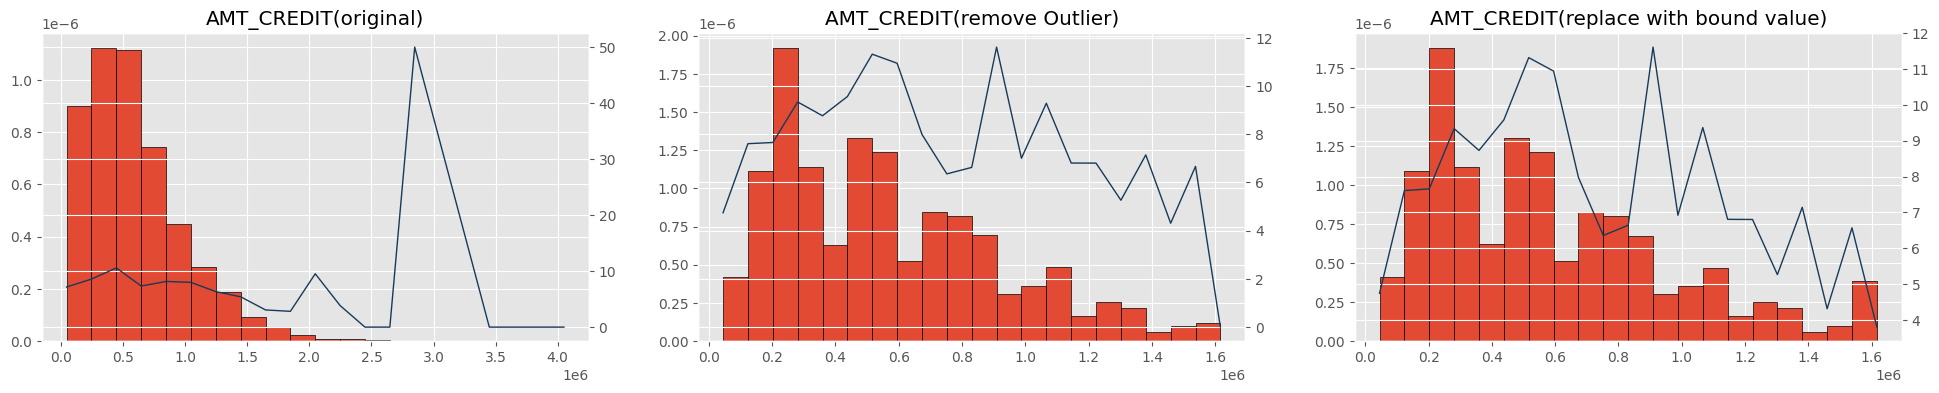

In [20]:
magicEye.eda.examineAnoralies(tr,"AMT_CREDIT",bins=20,target_col="TARGET",figsize=(24,4))

> * <font size=2.5>**remove outlier issue** </font><br>
>   <font size=2.5><span style="background-color:#FFE6E6;color:crimson">- replace outlier with bound value : **AMT_CREDIT** </span></font><br><br>


----
### <span style="color:Green"> 110.<font size=2.5>4. **REGION_POPULATION_RELATIVE** (outlier examine)</span>

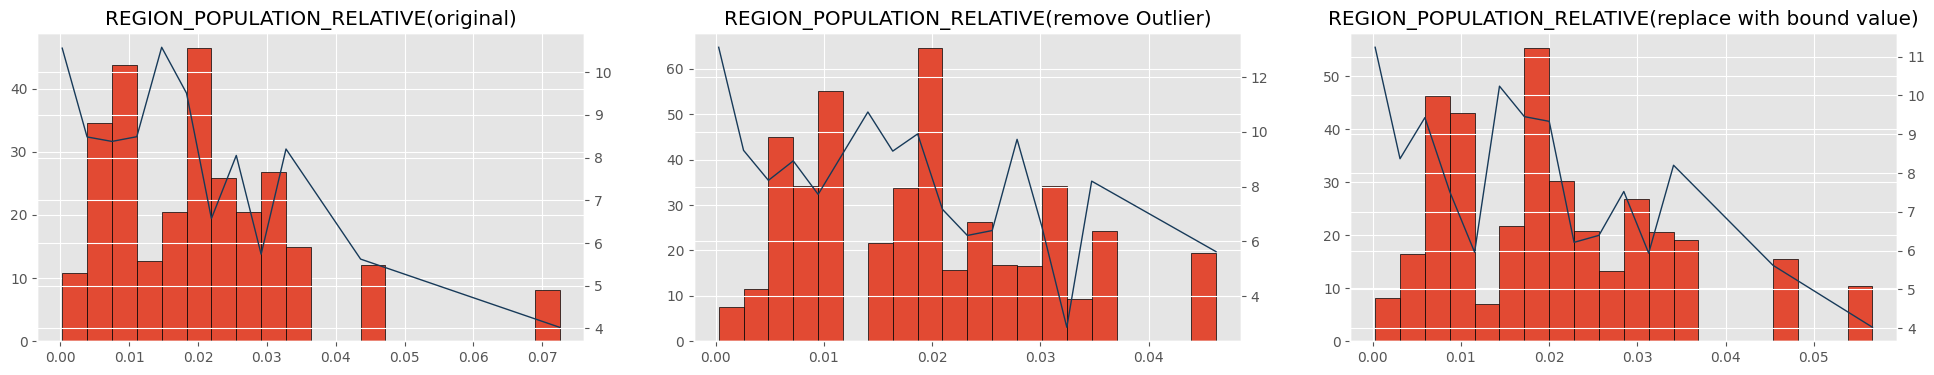

In [21]:
magicEye.eda.examineAnoralies(tr,"REGION_POPULATION_RELATIVE",bins=20,target_col="TARGET",figsize=(24,4))

> * <font size=2.5>**remove outlier issue** </font><br>
>   <font size=2.5><span style="background-color:#FFE6E6;color:crimson">- replace outlier with bound value : **REGION_POPULATION_RELATIVE** </span></font><br><br>


----

## <span style="color:Green"> 111. <font size=4> **Correlation**</span>

In [22]:
corr = magicEye.eda.get_corr(tr)
corr.filter(pl.col("col1")=="TARGET").head(10).to_pandas()

col1                        col2      corr  abs_corr
0  TARGET                  CB_SCORE_1  0.128685  0.128685
1  TARGET                  DAYS_BIRTH  0.081415  0.081415
2  TARGET        REGION_RATING_CLIENT  0.066378  0.066378
3  TARGET      REG_CITY_NOT_WORK_CITY  0.058663  0.058663
4  TARGET             FLAG_DOCUMENT_3  0.046062  0.046062
5  TARGET      REG_CITY_NOT_LIVE_CITY  0.044159  0.044159
6  TARGET             DAYS_ID_PUBLISH  0.043021  0.043021
7  TARGET  REGION_POPULATION_RELATIVE -0.040874  0.040874
8  TARGET              FLAG_EMP_PHONE  0.039226  0.039226
9  TARGET               DAYS_EMPLOYED -0.038986  0.038986

> * <font size=2.5>**correlaton with Target** </font><br>
>   <font size=2.5><span style="background-color:#FFE6E6;color:crimson">- 특별히 큰 상관관계를 갖는 변수 없음 </span></font><br>
>   <font size=2.5><span style="background-color:#FFE6E6;color:crimson">- feature select 시 참고 </span></font><br><br>


In [23]:
corr.filter(pl.col("col1")>pl.col("col2")).head(10).to_pandas()

col1                        col2      corr  abs_corr
0          FLAG_EMP_PHONE               DAYS_EMPLOYED -0.999886  0.999886
1  REG_CITY_NOT_WORK_CITY     LIVE_CITY_NOT_WORK_CITY  0.829092  0.829092
2          FLAG_EMP_PHONE                  DAYS_BIRTH  0.620144  0.620144
3           DAYS_EMPLOYED                  DAYS_BIRTH -0.611425  0.611425
4       DAYS_REGISTRATION                  CB_SCORE_2 -0.551678  0.551678
5    REGION_RATING_CLIENT  REGION_POPULATION_RELATIVE -0.536847  0.536847
6  REG_CITY_NOT_WORK_CITY      REG_CITY_NOT_LIVE_CITY  0.441686  0.441686
7              CB_SCORE_2                  AMT_CREDIT -0.368636  0.368636
8       DAYS_REGISTRATION                  DAYS_BIRTH  0.333045  0.333045
9              DAYS_BIRTH                CNT_CHILDREN  0.323286  0.323286

> * <font size=2.5>**correlaton with each other** </font><br>
>   <font size=2.5><span style="background-color:#FFE6E6;color:crimson">- 매우 큰 상관관계를 갖는 변수 존재 </span></font><br>
>   <font size=2.5><span style="background-color:#FFE6E6;color:crimson">- 다중공선성 이슈 (변수제거, 주성분분석 등 고려) </span></font><br><br>


# <span style="color:white"><font size=0.1> 200. preprocessing </font></span>
----
<div class="alert alert-info">
    <font size=6><strong>Pre-precessing</strong></font>
</div>

----
## <span style="color:Green"> 201. <font size=4> **set Preprocess flow** <font size=2.5>: set pipeline >> fit preprocessor </font></span>

----
### <span style="color:Green"> 201.<font size=2.5>1. **create Preprocessor**</font></span>

In [9]:
%%time
preprocessor = magicEye.util.Pipe([
    magicEye.data.createFC(),  # 신규 정보 Flag 칼럼 생성(FLAG_DAYS_EMPLOYED) (From Numerical Outiler)
    magicEye.data.replaceV(),  # 특정 칼럼 특정값 일괄 변경(CODE_GENDER:XNA>>Null,FLAG_DAYS_EMPLOYED:365243.0>>Null)
    magicEye.data.onehtENC(),  # 클래스 변수를 각 카테고리 변수로(binary) 분리(생성)
    magicEye.data.onehtENC(["CNT_CHILDREN",]),  # 일부 NUMERIC 변수를 카테고리 변수로(binary) 분리(생성)
    magicEye.data.labelENC(),  # 클래스 변수를 숫자형(ordinal) 변수로 변경()
    magicEye.data.removeNO(),  # 특이값(Outlier) 제거 : Outlier upper/lower bound 값으로 치환
    magicEye.data.minMaxSC(),  # 스케일 조정 (Normalize)(MinMax)
    magicEye.data.imputeCM(),  # Null값 예측 (CODE_GENDER,FLAG_OWN_REALTY)
    magicEye.data.imputeNM(),  # Null값 예측 (AMT_CREDIT 등 9개 column)
    magicEye.data.newFeats(),  # 새로운 변수 생성
    magicEye.data.removeNO(),  # 특이값(Outlier) 제거 (new features)
    magicEye.data.minMaxSC(),  # 스케일 조정 (Normalize)(MinMax) (new features)
    magicEye.data.imputeNM(),  # Null값 예측 (new feature)
    magicEye.data.imputeNS("median"),
    magicEye.data.dropCols(),  # 불필요한 칼럼 삭제 (SK_ID_CURR,TARGET,FLAG_MOBIL)
])

CPU times: total: 0 ns
Wall time: 0 ns


> * <font size=2.5><span style="background-color:#fff5b1;color:crimson">**set pre-process Flow**</span> : sequential process / pipeline / fit</font><br><br>
> <font size=2.5>1.createFC : <span style="color:crimson">FLAG_DAYS_EMPLOYED 칼럼 신규 생성</span></font><br>
> <font size=2.5>2.replaceV : <span style="color:crimson">CODE_GENDER의 "XNA"값 Null로 변환, FLAG_DAYS_EMPLOYED의 365,243.0값 Null로 변환 </span></font><br>
> <font size=2.5>3.onehtENC : <span style="color:crimson">클래스 변수의 각 class별 변수(binary) 생성 (2개 이하의 class를 갖는 변수는 제외)</span></font><br>
> <font size=2.5>4.onehtENC : <span style="color:crimson">연속형 변수인 CNT_CHILDREN를 클래스변수로 간주하여 onehot-encoding</span></font><br>
> <font size=2.5>5.labelENC : <span style="color:crimson">클래스 변수의 각 class에 1개의 숫자를 매칭하여 변경(label-encoding)</span></font><br>
> <font size=2.5>6.removeNO : <span style="color:crimson">특이값 제거(이상치 경계 기준으로 변경) >> 정보 변별력을 높임</span></font><br>
> <font size=2.5>7.minMaxSC : <span style="color:crimson">스케일 조정(min-max) >> 큰 값을 가진 변수로 인한 학습 방해 방지</span></font><br>
> <font size=2.5>8.imputeCM : <span style="color:crimson">범주형 변수에 대한 결측값 예측(IterativeImputer)(CODE_GENDER,FLAG_OWN_REALTY)</span></font><br>
> <font size=2.5>9.imputeNM : <span style="color:crimson">연속형 변수에 대한 결측값 예측(IterativeImputer)</span></font><br>
> <font size=2.5>10.newFeats : <span style="color:crimson">변수들의 조합을 통해 새로운 변수 31개 생성(IterativeImputer)(CREDIT_CB1_RATIO 등)</span></font><br>
> <font size=2.5>11.removeNO : <span style="color:crimson">특이값 제거(신규 변수 생성으로 인한)</span></font><br>
> <font size=2.5>12.minMaxSC : <span style="color:crimson">스케일 조정(min-max)(신규 변수 생성으로 인한)</span></font><br>
> <font size=2.5>13.imputeNM : <span style="color:crimson">결측값 예측(신규 변수 생성으로 인한)</span></font><br>
> <font size=2.5>14.imputeNS : <span style="color:crimson">결측값 치환(median)(신규 변수 생성으로 인한)</span></font><br>
> <font size=2.5>15.dropCols : <span style="color:crimson">불필요한 변수 제거(SK_ID_CURR,FLAG_MOBIL) </span></font><br>
<br><br>
removeNO

----
### <span style="color:Green"> 201.<font size=2.5>2. **fit Preprocessor**</font></span>

In [24]:
%%time
# preprocessor.fit(tr)

CPU times: user 1h 19min 51s, sys: 9h 28min 32s, total: 10h 48min 24s
Wall time: 27min 19s


> * <font size=2.5><span style="background-color:#fff5b1;color:crimson">**fit**</span> 전처리 조건을 확정</font><br><br>
<br><br>


----
### <span style="color:Green"> 201.<font size=2.5>3. **save Preprocessor**</font></span>

In [22]:
# magicEye.util.save(preprocessor,"./objects/preprocessor")   
preprocessor = magicEye.util.load("./objects/preprocessor")

> * <font size=2.5><span style="background-color:#fff5b1;color:crimson">**save/load**</span> 필요에 따라 처리</font><br><br>
<br><br>


----
## <span style="color:Green"> 202. <font size=4> **get preprocessed data** <font size=2.5>:  transform preprocessor </font></span>

In [26]:
%%time
# preprocessed_tr = preprocessor.transform(tr)
# preprocessed_te = preprocessor.transform(te)

CPU times: user 31.5 s, sys: 2min 38s, total: 3min 10s
Wall time: 19.4 s


> * <font size=2.5><span style="background-color:#fff5b1;color:crimson">**run preprocess**</span> for train, test data</font><br><br>

In [14]:
# magicEye.util.save(preprocessed_tr,"./data/preprocessed_tr")
# magicEye.util.save(preprocessed_te,"./data/preprocessed_te")
preprocessed_tr = magicEye.util.load("./data/preprocessed_tr")
preprocessed_te = magicEye.util.load("./data/preprocessed_te")

> * <font size=2.5><span style="background-color:#fff5b1;color:crimson">**save/load**</span> (필요에 따라)</font><br>
<br>

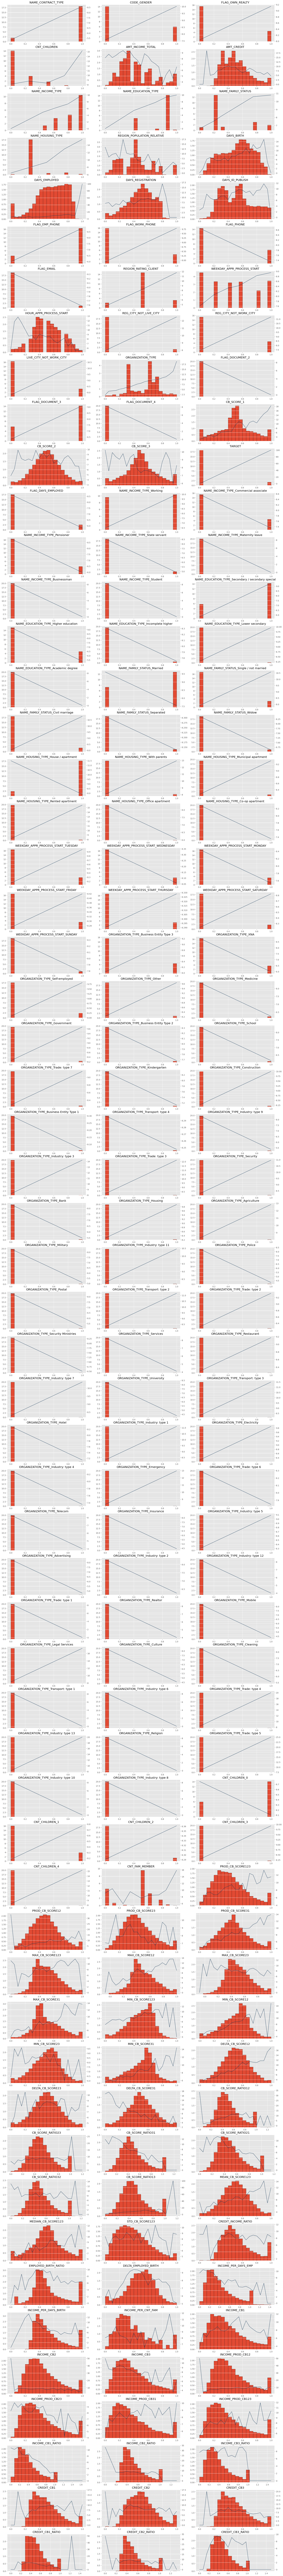

CPU times: user 3min 46s, sys: 29.3 s, total: 4min 16s
Wall time: 43.8 s


In [27]:
%%time
magicEye.eda.plot_numerical_d(preprocessed_tr,target_col="TARGET",figsize=(24,400))

> * <font size=2.5><span style="background-color:#fff5b1;color:crimson">**전처리 데이터 확인**</span> </font><br>
<br>

In [29]:
%%time
# magicEye.eda.visFeat(magicEye.data.Dataset(preprocessed_tr),figsize=(24,400))

CPU times: user 9 µs, sys: 1e+03 ns, total: 10 µs
Wall time: 20.3 µs


In [6]:
# magicEye.eda.get_corr(preprocessed_tr).filter(pl.col("col1")=="TARGET").head(10).to_pandas()

# <span style="color:white"><font size=0.1> 300. Train </font></span>
----
<div class="alert alert-info">
    <font size=6><strong> Train </strong></font>
</div>

----
## <span style="color:Green"> 301. <font size=4> **Train with Base Data** </font><font size=2.5></font></span>

----
### <span style="color:Green"> 301.<font size=2.5>1. **get data**</span>

In [15]:
%%time
train_BASE = magicEye.data.Dataset(preprocessed_tr)
test_BASE  = magicEye.data.Dataset(preprocessed_te)

CPU times: total: 0 ns
Wall time: 1.51 ms


----
### <span style="color:Green"> 301.<font size=2.5>2. **process setting** : parameter-grid, estimators</span>

In [9]:
for mCode,estimator in zip(model_codes,estimators):
    print(f"{mCode} : {estimator}")

mKNN : <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
mRFC : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
mLRC : <class 'sklearn.linear_model._logistic.LogisticRegression'>
mSVC : <class 'sklearn.svm._classes.SVC'>
mXGB : <class 'xgboost.sklearn.XGBClassifier'>
mLGB : <class 'lightgbm.sklearn.LGBMClassifier'>
mNN0 : <class 'magicEye.model.myNN0'>
mNN1 : <class 'magicEye.model.myNN1'>
mNN2 : <class 'magicEye.model.myNN2'>
mNN3 : <class 'magicEye.model.myNN3'>


In [9]:
param_grids[0]

{'n_neighbors': [10, 30, 50, 100], 'weights': ['distance']}

> * <font size=2.5><span style="background-color:#fff5b1;color:crimson">**parameter-grid**</span></font><br>
>   <font size=2.5>- for **Hyper Parameter Tunning**</font><br>
>   <font size=2.5>- modeling에 사용될 estimator별 paramter-grid를 각각 설정함</font><br>
>   <font size=2.5>- 각 parameter_grid는 ./MagicEye/model_params.py에 기록되어 있음</font><br><br>
> * <font size=2.5><span style="background-color:#fff5b1;color:crimson">**estimator**</span> : modeling에 사용될 10개 estimator</font><br>
>   <font size=2.5>- KNN(K-NearestNeighbor Classifier) (sklearn)</font><br>
>   <font size=2.5>- LRC(LogistitRegression Classifier) (sklearn)</font><br>
>   <font size=2.5>- RFC(RandomForest Classifier) (sklearn)</font><br>
>   <font size=2.5>- SVC(SupportVetorMachine Classifier) (sklearn)</font><br>
>   <font size=2.5>- XGB(XtreamGradientBoost Classifier) (xgboost)</font><br>
>   <font size=2.5>- LGB(LightGradientBoost Classifier) (lightgbm)</font><br>
>   <font size=2.5>- mNN0(NuralNetwork) (pytorch) (magicEye/model.py)</font><br>
>   <font size=2.5>- mNN1(NuralNetwork) (pytorch) (magicEye/model.py)</font><br>
>   <font size=2.5>- mNN2(NuralNetwork) (pytorch) (magicEye/model.py)</font><br>
>   <font size=2.5>- mNN3(NuralNetwork) (pytorch) (magicEye/model.py)</font><br>
<br>

----
### <span style="color:Green"> 301.<font size=2.5>3. **fit / grid Search** (with CV)</span>

In [35]:
def gsCvFit(train,test,dCode):
    models = dotdict()
    for idx, mCode in enumerate(model_codes):
        sys.stdout.write(f"{mCode}")
        gsCV = magicEye.model.gridSearchCV(
                            estimator =estimators[idx],
                            param_grid=param_grids[idx],
                            n_cv=5)
        gsCV.fit(train=train,test=test)
        models[mCode] = dotdict({
            "model"    : gsCV.model,
            "auc_valid": gsCV.auc_valid,
            "auc_test" : gsCV.auc_test,
            "param"    : gsCV.param,
        })
        print(f"/ auc_valid : {models[mCode].auc_valid:<5.4f} / auc_test : {models[mCode].auc_test:<5.4f}")
        print(models[mCode].param)
        
        magicEye.util.save(models[mCode],f"./models/{mCode}_{dCode}.mInfo")    # 모델 및 정보(최적파라미터, auc 등) 저장

In [17]:
mInfo_BASE = gsCvFit(train_BASE,test_BASE,"BASE")  # 학습 후 모델 및 정보 받아옴

----
### <span style="color:Green"> 301.<font size=2.5>4. **model performance** (auc)</span>

In [14]:
for mCode in model_codes:
    print(f"{mCode} : valid {mInfo_BASE[mCode].auc_valid:<9.6f}/test {mInfo_BASE[mCode].auc_test:<9.6f}")

mKNN : valid 0.638026 /test 0.638158 
mRFC : valid 0.662464 /test 0.693420 
mLRC : valid 0.682201 /test 0.717407 
mSVC : valid 0.607900 /test 0.577406 
mXGB : valid 0.684648 /test 0.707481 
mLGB : valid 0.680362 /test 0.695918 
mNN0 : valid 0.683356 /test 0.720450 
mNN1 : valid 0.685578 /test 0.718594 
mNN2 : valid 0.688082 /test 0.715698 
mNN3 : valid 0.687777 /test 0.716124 


> * <font size=2.5><span style="background-color:#fff5b1;color:crimson">**auc**</span></font><br>
>   <font size=2.5>- valid(cv), test 모두 *nn계열(mNN0,mNN1,mNN2,mNN3) 및 로지스틱모형 성능이 좋은 편임</font><br>
>   <font size=2.5>- KNN, SVC 성능이 상대적으로 좋지 않음</font><br>
>   <font size=2.5>- valid 기준으로 모형 선택시 mNN2(valid:0.6888)이 선택되며, test성능은 0.7157</font><br><br>


----
## <span style="color:Green"> 302. <font size=4> **Train with "Feature Selected" Data** </font></span><span style="color:crimson"><font size=2.5>#1.Feature Importance(FS0)</font></span>

----
### <span style="color:Green"> 302.<font size=2.5>1. **get data (feature selection from base Data)**</span>

In [23]:
train_FS0 = magicEye.data.Dataset(preprocessed_tr)        # base 데이터로부터
train_FS0.feature_select_imp(model=mInfo_BASE.mXGB.model) # feature importance(xXGB) 기준으로 선택

test_FS0 = magicEye.data.Dataset(preprocessed_te)        
test_FS0.feature_select_imp(cols=train_FS0.features_imp) 

# magicEye.util.save(train_FS0,"./data/train_FS0")          # 생성된 데이터 저장
# magicEye.util.save(test_FS0,"./data/test_FS0")

In [17]:
train_FS0 = magicEye.util.load("./data/train_FS0")      # 저장된 데이터 불러오기
test_FS0 = magicEye.util.load("./data/test_FS0")

In [32]:
train_FS0.x.shape

(21600, 56)

> * <font size=2.5><span style="background-color:#fff5b1;color:crimson">**feature importance 기준 변수 선택**</span></font><br>
>   <font size=2.5>- feature importance 산출이 가능한 학습 모형중 성능이 가장 좋은 XGB모형을 기준으로 imortance를 구함</font><br>
>   <font size=2.5>- magicEye.data.Dataset class의 method인 feature_select_imp를 통해 56개 변수 선택됨</font><br>
>   <font size=2.5>- 작업 효율을 위해 생성된 데이터를 file로 저장함</font><br><br>

----
### <span style="color:Green"> 302.<font size=2.5>2. **process setting** : parameter-grid, estimators</span>

In [20]:
for mCode,estimator in zip(model_codes,estimators):
    print(f"{mCode} : {estimator}")

mKNN : <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
mRFC : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
mLRC : <class 'sklearn.linear_model._logistic.LogisticRegression'>
mSVC : <class 'sklearn.svm._classes.SVC'>
mXGB : <class 'xgboost.sklearn.XGBClassifier'>
mLGB : <class 'lightgbm.sklearn.LGBMClassifier'>
mNN0 : <class 'magicEye.model.myNN0'>
mNN1 : <class 'magicEye.model.myNN1'>
mNN2 : <class 'magicEye.model.myNN2'>
mNN3 : <class 'magicEye.model.myNN3'>


In [33]:
param_grids[0] # param_grids 예시

{'n_neighbors': [10, 30, 50, 100], 'weights': ['distance'], 'n_jobs': [-1]}

> * <font size=2.5><span style="background-color:#fff5b1;color:crimson">**BASE 데이터 처리시와 동일**</span></font><br>
>   <font size=2.5>- 동일, param_grids, estimators 사용</font><br><br>

----
### <span style="color:Green"> 302.<font size=2.5>3. **fit / grid Search** (with CV)</span>

In [37]:
mInfo_FS0 = gsCvFit(train_BASE,test_BASE,"FS0")  # 최적 parameter 탐색 + CV 및 학습 후 모델 및 정보 받아옴

In [38]:
mInfo_FS0 = models["FS0"]                        # 저장된 학습 정보 읽어옴

----
### <span style="color:Green"> 302.<font size=2.5>4. **model performance** (auc)</span>

In [25]:
for mCode in model_codes:
    print(f"{mCode} : valid {mInfo_FS0[mCode].auc_valid:<9.6f}/test {mInfo_FS0[mCode].auc_test:<9.6f}")

mKNN : valid 0.652886 /test 0.680950 
mRFC : valid 0.664122 /test 0.693678 
mLRC : valid 0.684481 /test 0.711250 
mSVC : valid 0.589674 /test 0.590318 
mXGB : valid 0.687384 /test 0.706490 
mLGB : valid 0.683369 /test 0.699959 
mNN0 : valid 0.684508 /test 0.713653 
mNN1 : valid 0.691579 /test 0.715183 
mNN2 : valid 0.689051 /test 0.712977 
mNN3 : valid 0.690312 /test 0.711146 


> * <font size=2.5><span style="background-color:#fff5b1;color:crimson">**feature select(importance) 학습을 통한 성능 향상**</span></font><br>
>   <font size=2.5>- feature select(FS0)로 학습한 모형이 full data(BASE)로 학습한 모형보다 대체로 성능이 향상됨(valid기준,SVC제외)</font><br>
>   <font size=2.5>- nn계열(mNN0,mNN1,mNN2,mNN3) 모형은 valid기준 성능 향상이 있었으나 test 성능은 오히려 조금 낮아짐</font><br>
>   <font size=2.5>- valid 기준으로 모형 선택시 mNN1(valid:0.6916)이 선택되며, test성능은 0.7152</font><br>
>   <font size=2.5>- valid와 test의 성능 편차가 줄었으니 이 또한 모형 안정성이 향상된 것으로 볼 수 있음</font><br>
<br>


> * <font size=2.5><span style="background-color:#fff5b1;color:crimson">**feature importance 상위 칼럼 선택**</span>  </font><br>
>   <font size=2.5>- feature importance 산출이 가능한 train 모형 중 auc가 높았던 XGB모형 참조</font><br>
>   <font size=2.5>- feature importance > 0 인 features 선택</font><br>
>   <font size=2.5>- magicEye.data.Dataset의 feature_select_imp method 사용</font><br><br>


----
## <span style="color:Green"> 303. <font size=4> **Train with "Feature Selected" Data** </font></span><span style="color:crimson"><font size=2.5>#2.Permutation Importance(FS1)</font></span>

----
### <span style="color:Green"> 303.<font size=2.5>1. **get data (feature selection from base Data)**</span>

In [29]:
train_FS1 = magicEye.data.Dataset(preprocessed_tr)          # base 데이터로부터
train_FS1.feature_select_pimp(model=mInfo_BASE.mXGB.model)  # feature select with feature importance(xXGB)

test_FS1 = magicEye.data.Dataset(preprocessed_te)        
test_FS1.feature_select_pimp(cols=train_FS1.features_pimp) 

# magicEye.util.save(train_FS1,"./data/train_FS1")          # 생성된 데이터 저장
# magicEye.util.save(test_FS1,"./data/test_FS1")

In [31]:
train_FS1 = magicEye.util.load("./data/train_FS1")      # 저장된 데이터 불러오기
test_FS1 = magicEye.util.load("./data/test_FS1")

In [12]:
train_FS1.x.shape

(21600, 45)

> * <font size=2.5><span style="background-color:#fff5b1;color:crimson">**permutation importance 기준 변수 선택**</span></font><br>
>   <font size=2.5>- magicEye.data.Dataset class의 method인 feature_select_imp를 통해 45개 변수 선택됨</font><br>
>   <font size=2.5>- 작업 효율을 위해 생성된 데이터를 file로 저장함</font><br><br>

----
### <span style="color:Green"> 303.<font size=2.5>2. **process setting** : parameter-grid, estimators</span>

In [20]:
for mCode,estimator in zip(model_codes,estimators):
    print(f"{mCode} : {estimator}")

mKNN : <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
mRFC : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
mLRC : <class 'sklearn.linear_model._logistic.LogisticRegression'>
mSVC : <class 'sklearn.svm._classes.SVC'>
mXGB : <class 'xgboost.sklearn.XGBClassifier'>
mLGB : <class 'lightgbm.sklearn.LGBMClassifier'>
mNN0 : <class 'magicEye.model.myNN0'>
mNN1 : <class 'magicEye.model.myNN1'>
mNN2 : <class 'magicEye.model.myNN2'>
mNN3 : <class 'magicEye.model.myNN3'>


In [21]:
param_grids[0] # param_grids 예시

{'n_neighbors': [10, 30, 50, 100], 'weights': ['distance']}

> * <font size=2.5><span style="background-color:#fff5b1;color:crimson">**BASE 데이터 처리시와 동일**</span></font><br>
>   <font size=2.5>- 동일, param_grids, estimators 사용</font><br><br>

----
### <span style="color:Green"> 303.<font size=2.5>3. **fit / grid Search** (with CV)</span>

In [22]:
mInfo_FS1 = gsCvFit(train_BASE,test_BASE,"FS1")  # 최적 parameter 탐색 + CV 및 학습 후 모델 및 정보 받아옴

In [31]:
mInfo_FS1 = models["FS1"]                        # 저장된 학습 정보 읽어옴

----
### <span style="color:Green"> 303.<font size=2.5>4. **model performance** (auc)</span>

In [26]:
for mCode in model_codes:
    print(f"{mCode} : valid {mInfo_BASE[mCode].auc_valid:<9.6f}/test {mInfo_BASE[mCode].auc_test:<9.6f}")

mKNN : valid 0.638026 /test 0.638158 
mRFC : valid 0.662464 /test 0.693420 
mLRC : valid 0.682201 /test 0.717407 
mSVC : valid 0.607900 /test 0.577406 
mXGB : valid 0.684648 /test 0.707481 
mLGB : valid 0.680362 /test 0.695918 
mNN0 : valid 0.683356 /test 0.720450 
mNN1 : valid 0.685578 /test 0.718594 
mNN2 : valid 0.688082 /test 0.715698 
mNN3 : valid 0.687777 /test 0.716124 


In [32]:
for mCode in model_codes:
    print(f"{mCode} : valid {mInfo_FS1[mCode].auc_valid:<9.6f}/test {mInfo_FS1[mCode].auc_test:<9.6f}")

mKNN : valid 0.654366 /test 0.668524 
mRFC : valid 0.667105 /test 0.695445 
mLRC : valid 0.683713 /test 0.711560 
mSVC : valid 0.589244 /test 0.582085 
mXGB : valid 0.687452 /test 0.707297 
mLGB : valid 0.682443 /test 0.700988 
mNN0 : valid 0.683404 /test 0.717407 
mNN1 : valid 0.688248 /test 0.717395 
mNN2 : valid 0.689192 /test 0.719522 
mNN3 : valid 0.690851 /test 0.716814 


> * <font size=2.5><span style="background-color:#fff5b1;color:crimson">**feature select(Permutation importance) 학습을 통한 성능 향상**</span></font><br>
>   <font size=2.5>- feature select(FS1)로 학습한 모형이 full data(BASE)로 학습한 모형보다 대체로 성능이 향상됨(valid기준,SVC제외)</font><br>
>   <font size=2.5>- valid 기준으로 모형 선택시 mNN3(valid:0.6909)이 선택되며, test성능은 0.7168</font><br>
>   <font size=2.5>- valid와 test의 성능 편차가 줄었으니 이 또한 모형 안정성이 향상된 것으로 볼 수 있음</font><br>
<br>


----
## <span style="color:Green"> 304. <font size=4> **Train with "Feature Selected" Data** </font></span><span style="color:crimson"><font size=2.5>#3.feature_select_KBest(FS2)</font></span>

----
### <span style="color:Green"> 304.<font size=2.5>1. **get data (feature selection from base Data)**</span>

In [33]:
train_FS2 = magicEye.data.Dataset(preprocessed_tr)      # train 초기화
train_FS2.feature_select_KBest(k=50)                    # feature select with feature_select_KBest package

test_FS2 = magicEye.data.Dataset(preprocessed_te)        
test_FS2.feature_select_KBest(cols=train_FS2.features_KBest) 

# magicEye.util.save(train_FS2,"./data/train_FS2")          # 생성된 데이터 저장
# magicEye.util.save(test_FS2,"./data/test_FS2")

In [32]:
train_FS2 = magicEye.util.load("./data/train_FS2")      # 저장된 데이터 불러오기
test_FS2 = magicEye.util.load("./data/test_FS2")

In [34]:
train_FS2.x.shape

(21600, 50)

> * <font size=2.5><span style="background-color:#fff5b1;color:crimson">**KBest 방법으로 변수 선택**</span></font><br>
>   <font size=2.5>- feature_select_KBest package를 통해 50개(FS0,FS1의 평균) 변수를 선택함 </font><br>
>   <font size=2.5>- 작업 효율을 위해 생성된 데이터를 file로 저장함</font><br><br>

----
### <span style="color:Green"> 304.<font size=2.5>2. **process setting** : parameter-grid, estimators</span>

In [20]:
for mCode,estimator in zip(model_codes,estimators):
    print(f"{mCode} : {estimator}")

mKNN : <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
mRFC : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
mLRC : <class 'sklearn.linear_model._logistic.LogisticRegression'>
mSVC : <class 'sklearn.svm._classes.SVC'>
mXGB : <class 'xgboost.sklearn.XGBClassifier'>
mLGB : <class 'lightgbm.sklearn.LGBMClassifier'>
mNN0 : <class 'magicEye.model.myNN0'>
mNN1 : <class 'magicEye.model.myNN1'>
mNN2 : <class 'magicEye.model.myNN2'>
mNN3 : <class 'magicEye.model.myNN3'>


In [21]:
param_grids[0] # param_grids 예시

{'n_neighbors': [10, 30, 50, 100], 'weights': ['distance']}

> * <font size=2.5><span style="background-color:#fff5b1;color:crimson">**BASE 데이터 처리시와 동일**</span></font><br>
>   <font size=2.5>- 동일, param_grids, estimators 사용</font><br><br>

----
### <span style="color:Green"> 304.<font size=2.5>3. **fit / grid Search** (with CV)</span>

In [22]:
mInfo_FS2 = gsCvFit(train_BASE,test_BASE,"FS2")  # 최적 parameter 탐색 + CV 및 학습 후 모델 및 정보 받아옴

In [35]:
mInfo_FS2 = models["FS2"]                        # 저장된 학습 정보 읽어옴

----
### <span style="color:Green"> 304.<font size=2.5>4. **model performance** (auc)</span>

In [26]:
for mCode in model_codes:
    print(f"{mCode} : valid {mInfo_BASE[mCode].auc_valid:<9.6f}/test {mInfo_BASE[mCode].auc_test:<9.6f}")

mKNN : valid 0.638026 /test 0.638158 
mRFC : valid 0.662464 /test 0.693420 
mLRC : valid 0.682201 /test 0.717407 
mSVC : valid 0.607900 /test 0.577406 
mXGB : valid 0.684648 /test 0.707481 
mLGB : valid 0.680362 /test 0.695918 
mNN0 : valid 0.683356 /test 0.720450 
mNN1 : valid 0.685578 /test 0.718594 
mNN2 : valid 0.688082 /test 0.715698 
mNN3 : valid 0.687777 /test 0.716124 


In [36]:
for mCode in model_codes:
    print(f"{mCode} : valid {mInfo_FS2[mCode].auc_valid:<9.6f}/test {mInfo_FS2[mCode].auc_test:<9.6f}")

mKNN : valid 0.648091 /test 0.672728 
mRFC : valid 0.663801 /test 0.690493 
mLRC : valid 0.686180 /test 0.712038 
mSVC : valid 0.592995 /test 0.576449 
mXGB : valid 0.686355 /test 0.710327 
mLGB : valid 0.682921 /test 0.705171 
mNN0 : valid 0.687256 /test 0.718008 
mNN1 : valid 0.686919 /test 0.720411 
mNN2 : valid 0.686034 /test 0.718017 
mNN3 : valid 0.688125 /test 0.720929 


> * <font size=2.5><span style="background-color:#fff5b1;color:crimson">**feature select(KBest) 학습을 통한 성능 향상**</span></font><br>
>   <font size=2.5>- KBest(FS2)로 학습한 모형이 full data(BASE)로 학습한 모형보다 대체로 성능이 향상됨(valid기준,SVC제외)</font><br>
>   <font size=2.5>- valid 기준으로 모형 선택시 mNN3(valid:0.6881)이 선택되며, test성능은 0.7209</font><br>
>   <font size=2.5>- valid보다 test의 성능이 더 향상됨</font><br>
<br>


----
## <span style="color:Green"> 305. <font size=4> **Train with "Principal Component Analysis" Data** </font></span><span style="color:crimson"><font size=2.5> (PCA)</font></span>

----
### <span style="color:Green"> 305.<font size=2.5>1. **get data (PCA)**</span>

In [18]:
pca_base_dCode = "FS0"
pca_base_columns = train_FS0.x.columns

# train_PCA = magicEye.data.Dataset(preprocessed_tr)          # train 초기화
# train_PCA.feature_select_pimp(cols=pca_base_columns)        # feature select with feature importance(xXGB)
# train_PCA.feature_pca()                                     # pca

# test_PCA = magicEye.data.Dataset(preprocessed_te)
# test_PCA.feature_select_pimp(cols=pca_base_columns) 
# test_PCA.feature_pca(pca=train_PCA.pca) 

# magicEye.util.save(train_PCA,f"./data/train_PCA_{pca_base_dCode}")
# magicEye.util.save(test_PCA,f"./data/test_PCA_{pca_base_dCode}")

In [19]:
train_PCA = magicEye.util.load(f"./data/train_PCA_{pca_base_dCode}")
test_PCA = magicEye.util.load(f"./data/test_PCA_{pca_base_dCode}")

In [17]:
train_PCA.x.shape

(21600, 56)

> * <font size=2.5><span style="background-color:#fff5b1;color:crimson">**주성분 분석을 통한 변수 생성**</span></font><br>
>   <font size=2.5>- 대체로 성능이 좋았던 FS0(feature importance기준 변수선택)에서 선택된 변수를 기초로 주성분 분석 </font><br>
>   <font size=2.5>- 56개의 독립 변수 생성</font><br><br>

----
### <span style="color:Green"> 305.<font size=2.5>2. **process setting** : parameter-grid, estimators</span>

In [20]:
for mCode,estimator in zip(model_codes,estimators):
    print(f"{mCode} : {estimator}")

mKNN : <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
mRFC : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
mLRC : <class 'sklearn.linear_model._logistic.LogisticRegression'>
mSVC : <class 'sklearn.svm._classes.SVC'>
mXGB : <class 'xgboost.sklearn.XGBClassifier'>
mLGB : <class 'lightgbm.sklearn.LGBMClassifier'>
mNN0 : <class 'magicEye.model.myNN0'>
mNN1 : <class 'magicEye.model.myNN1'>
mNN2 : <class 'magicEye.model.myNN2'>
mNN3 : <class 'magicEye.model.myNN3'>


In [21]:
param_grids[0] # param_grids 예시

{'n_neighbors': [10, 30, 50, 100], 'weights': ['distance']}

> * <font size=2.5><span style="background-color:#fff5b1;color:crimson">**BASE 데이터 처리시와 동일**</span></font><br>
>   <font size=2.5>- 동일, param_grids, estimators 사용</font><br><br>

----
### <span style="color:Green"> 305.<font size=2.5>3. **fit / grid Search** (with CV)</span>

In [22]:
mInfo_PCA = gsCvFit(train_PCA,test_PCA,"PCA")  # 최적 parameter 탐색 + CV 및 학습 후 모델 및 정보 받아옴

In [60]:
mInfo_PCA = models["PCA"]                        # 저장된 학습 정보 읽어옴

----
### <span style="color:Green"> 305.<font size=2.5>4. **model performance** (auc)</span>

In [61]:
for mCode in model_codes:
    print(f"{mCode} : valid {mInfo_PCA[mCode].auc_valid:<9.6f}/test {mInfo_PCA[mCode].auc_test:<9.6f}")

mKNN : valid 0.652886 /test 0.680950 
mRFC : valid 0.661265 /test 0.690011 
mLRC : valid 0.684483 /test 0.711217 
mSVC : valid 0.589643 /test 0.582809 
mXGB : valid 0.672248 /test 0.711447 
mLGB : valid 0.668481 /test 0.704581 
mNN0 : valid 0.686093 /test 0.712108 
mNN1 : valid 0.688745 /test 0.713560 
mNN2 : valid 0.689754 /test 0.713148 
mNN3 : valid 0.689780 /test 0.709961 


> * <font size=2.5><span style="background-color:#fff5b1;color:crimson">**PCA 데이터 학습을 통한 성능 향상은 없었음**</span></font><br>
>   <font size=2.5>- FS0의 features를 기준으로 변수간 correlation을 제거함으로써 모형성능이 향상될 것으로 기대하였으나</font><br>
>   <font size=2.5>- FS0으로 학습한 모형에 비해 눈에 띄는 성능향상은 없었음</font><br>
<br>


# <span style="color:white"><font size=0.1> 400. Ensemble </font></span>
----
<div class="alert alert-info">
    <font size=6><strong> Ensemble </strong></font>
</div>

----
## <span style="color:Green"> 401. <font size=4> **Ensemble (stack)**</span>

----
### <span style="color:Green"> 401.<font size=2.5>1. **get data (from predicted values with models)**</span>

In [39]:
pred = []
pred.extend(magicEye.model.preds(models,dCode="BASE",x=train_BASE.x))
pred.extend(magicEye.model.preds(models,dCode="FS0" ,x=train_FS0.x))
pred.extend(magicEye.model.preds(models,dCode="FS1" ,x=train_FS1.x))
pred.extend(magicEye.model.preds(models,dCode="FS2" ,x=train_FS2.x))
pred.extend(magicEye.model.preds(models,dCode="PCA" ,x=train_PCA.x))
preds = pl.DataFrame(pred,orient="col")
preds.columns = [f"{dCode}_{mCode}" for dCode in magicEye.model.data_codes[:-1] for mCode in magicEye.model.model_codes]
drop_list = ["BASE_mKNN","FS0_mKNN","FS1_mKNN","FS2_mKNN","PCA_mKNN"]
train_ESB = magicEye.data.Dataset(x=preds.drop(drop_list),y=train_BASE.y)
magicEye.util.save(train_ESB,"./data/train_ESB")

pred = []
pred.extend(magicEye.model.preds(models,dCode="BASE",x=test_BASE.x))
pred.extend(magicEye.model.preds(models,dCode="FS0" ,x=test_FS0.x))
pred.extend(magicEye.model.preds(models,dCode="FS1" ,x=test_FS1.x))
pred.extend(magicEye.model.preds(models,dCode="FS2" ,x=test_FS2.x))
pred.extend(magicEye.model.preds(models,dCode="PCA" ,x=test_PCA.x))
preds = pl.DataFrame(pred,orient="col")
preds.columns = [f"{dCode}_{mCode}" for dCode in magicEye.model.data_codes[:-1] for mCode in magicEye.model.model_codes]
drop_list = ["BASE_mKNN","FS0_mKNN","FS1_mKNN","FS2_mKNN","PCA_mKNN"]
test_ESB = magicEye.data.Dataset(x=preds.drop(drop_list),y=test_BASE.y)
magicEye.util.save(test_ESB,"./data/test_ESB")

In [107]:
train_ESB = magicEye.util.load("./data/train_ESB")
test_ESB = magicEye.util.load("./data/test_ESB")

----
### <span style="color:Green"> 401.<font size=2.5>2. **process setting** : parameter-grid, estimators</span>

In [20]:
for mCode,estimator in zip(model_codes,estimators):
    print(f"{mCode} : {estimator}")

mKNN : <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
mRFC : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
mLRC : <class 'sklearn.linear_model._logistic.LogisticRegression'>
mSVC : <class 'sklearn.svm._classes.SVC'>
mXGB : <class 'xgboost.sklearn.XGBClassifier'>
mLGB : <class 'lightgbm.sklearn.LGBMClassifier'>
mNN0 : <class 'magicEye.model.myNN0'>
mNN1 : <class 'magicEye.model.myNN1'>
mNN2 : <class 'magicEye.model.myNN2'>
mNN3 : <class 'magicEye.model.myNN3'>


----
### <span style="color:Green"> 401.<font size=2.5>3. **fit / grid Search** (with CV)</span>

In [137]:
# %%time
# mESB = magicEye.model.myESB()
# mESB.fit(reals=train_ESB.y,preds=train_ESB.x[EBS_cols],sel_range=range(5,6),n_cv=5,test_set=[test_ESB.y,test_ESB.x[EBS_cols]])

In [22]:
mInfo_ESB = gsCvFit(train_ESB,test_ESB,"ESB")  # 최적 parameter 탐색 + CV 및 학습 후 모델 및 정보 받아옴

In [18]:
mInfo_ESB = models["ESB"]                        # 저장된 학습 정보 읽어옴

----
### <span style="color:Green"> 401.<font size=2.5>4. **model performance** (auc)</span>

In [19]:
for mCode in model_codes:
    print(f"{mCode} : valid {mInfo_ESB[mCode].auc_valid:<9.6f}/test {mInfo_ESB[mCode].auc_test:<9.6f}")

mKNN : valid 0.984208 /test 0.616722 
mRFC : valid 0.995601 /test 0.612472 
mLRC : valid 0.996038 /test 0.561024 
mSVC : valid 0.996201 /test 0.575497 
mXGB : valid 0.999199 /test 0.604540 
mLGB : valid 0.998969 /test 0.574505 
mNN0 : valid 0.992529 /test 0.710511 
mNN1 : valid 0.996233 /test 0.713556 
mNN2 : valid 0.996195 /test 0.712773 
mNN3 : valid 0.996634 /test 0.711167 


> * <font size=2.5><span style="background-color:#fff5b1;color:crimson">**대부분 과적합**</span></font><br>
>   <font size=2.5>- 앙상블-stack을 통해서는 눈에 띄는 성능향상 없었음</font><br>
>   <font size=2.5>- 과적합 성향이 있는 모형을 제외하고 다시 학습하고자 함 </font><br>
<br>


----
## <span style="color:Green"> 402. <font size=4> **Ensemble (modified soft voting)**</span>

> * <font size=2.5><span style="background-color:#fff5b1;color:crimson">**50개 모형 조합 평균으로 판별**</span></font><br>
>   <font size=2.5>- 모형마다 입력데이터 형태가 다르기 때문에 package를 사용하지 못하고 개발함</font><br>
>   <font size=2.5>- CV 적용하여 과적합을 줄이고자 하였음 </font><br>
>   <font size=2.5>- 과적합 성향있는 모형을 제외함으로써 과적합을 줄이고자 하였음 </font><br>
<br>


----
### <span style="color:Green"> 402.<font size=2.5>1. **get data (from predicted values with models)**</span>

In [26]:
train_ESB = magicEye.util.load("./data/train_ESB")
test_ESB = magicEye.util.load("./data/test_ESB")

In [40]:
# 과적합 성향이 있는 모형 제거
EBS_cols = [col for col in train_ESB.x.columns if col[-3:] not in ("KNN","RFC","SVC","LGB","NN1","NN3")]

----
### <span style="color:Green"> 402.<font size=2.5>2. **process setting** : parameter-grid, estimators</span>

In [ ]:
# magicEye.model.myESB classs로 정의함 

----
### <span style="color:Green"> 402.<font size=2.5>3. **fit / grid Search** (with CV)</span>

In [45]:
# %%time
# mESB = magicEye.model.myESB()
# mESB.fit(reals=train_ESB.y,preds=train_ESB.x[EBS_cols],sel_range=range(1,6),n_cv=5)
magicEye.util.save(mESB,"./models/mESB")

# print("auc_cv: 0.7342302  auc_test: 0.7214360  / ('BASE_mLRC', 'BASE_mXGB', 'BASE_mNN0', 'BASE_mNN2', 'FS2_mXGB', 'FS2_mNN2', 'PCA_mXGB')")

In [24]:
mESB = magicEye.util.load("./models/mESB")

----
### <span style="color:Green"> 402.<font size=2.5>4. **model performance** (auc)</span>

In [27]:
auc_test = magicEye.model.roc_auc_score(test_ESB.y,mESB.transform(test_ESB.x))

In [28]:
print(f"auc_cv: {mESB.auc:<10.7f} auc_test: {auc_test:<10.7f} / {mESB.combination}")

auc_cv: 0.7366843  auc_test: 0.7195650  / ['BASE_mLRC', 'BASE_mXGB', 'BASE_mNN0', 'BASE_mNN2', 'PCA_mXGB']


> * <font size=2.5><span style="background-color:#fff5b1;color:crimson">**성능 및 안정성 향상**</span></font><br>
>   <font size=2.5>- valid(cv), test의 auc 차이가 크지 않으며, test auc 향상됨</font><br>
>   <font size=2.5>- 최종 모형으로 선택함 </font><br>
<br>


# <span style="color:white"><font size=0.1> 999. Test 실행코드 </font></span>
----
<div class="alert alert-success">
    <font size=6><strong> Test 실행코드 </strong></font>
</div>

In [1]:
import magicEye
import sys
import warnings

import polars     as pl  # polars==0.17.9
import pandas     as pd  # padas ==1.3.5
import numpy      as np  # numpy ==1.19.5

from magicEye.util             import dotdict
import magicEye.util
import magicEye.data             
import magicEye.model 

In [2]:
# 앞에까지 eda를 제외한 모든 과정이 실행되어 있어야 함
# but, 긴 시간이 소요되므로 학습된 최종모형을 load하여 진행할수 있도록 test코드를 구성함
# 주최측의 요청으로 하나의 함수로 묶어냄

In [12]:
# for test (데이터 구성)
from sklearn.model_selection   import train_test_split
df = pl.read_parquet("/datasets/data/경진대회2023_lgo/loan_customer.p")
tr, te = train_test_split(df,test_size=0.1,random_state=1234)
hidden_org = te.drop("TARGET")

In [57]:
def test(hiddenDataFileName): 
    # file read
    # hiddenDataFileName = ".csv" 상대경로
    # HiddenData read (hidden Data는 .csv파일이라고 가정합니다.(=과제에서 주어진 형식)  
    hidden_org = pl.from_pandas(pd.read_csv(hiddenDataFileName))  
    
    # for test
    # df = pl.read_parquet("/datasets/data/경진대회2023_lgo/loan_customer.p")
    # tr, te = train_test_split(df,test_size=0.1,random_state=1234)
    # hidden_org = te.drop("TARGET")
    
    # preprocess fit (train BASE data)
    # skip >> load. 대부분의 학습 작업은 생략합니다. 대신 학습결과를 load하여 사용합니다. 
    preprocessor = magicEye.util.load("./objects/preprocessor") 
    # preprocess (hidden)
    pped_hidden = preprocessor.transform(hidden_org)
    hidden_BASE = magicEye.data.Dataset(pped_hidden)
    
    # permutaion importance 기준으로 선택한 features
    FS0_features= magicEye.util.load("./data/test_FS0").features_imp
    hidden_FS0  = magicEye.data.Dataset(pped_hidden)
    hidden_FS0.feature_select_imp(cols=FS0_features) 
    
    # permutaion importance 기준으로 선택한 features
    FS1_features= magicEye.util.load("./data/test_FS1").features_pimp
    hidden_FS1  = magicEye.data.Dataset(pped_hidden)
    hidden_FS1.feature_select_pimp(cols=FS1_features) 
    
    # KBest로 선택한 features
    FS2_features= magicEye.util.load("./data/test_FS2").features_KBest
    hidden_FS2  = magicEye.data.Dataset(pped_hidden)
    hidden_FS2.feature_select_KBest(cols=FS2_features) 
    
    # 주성분 features
    pca_base_columns = FS0_features
    pca         = magicEye.util.load("./data/test_PCA_FS0").pca
    hidden_PCA  = magicEye.data.Dataset(pped_hidden)
    hidden_PCA.feature_select_pimp(cols=pca_base_columns)
    hidden_PCA.feature_pca(pca=pca) 
    
    # 학습 모델 load (50개)
    models = magicEye.model.get_models()
    mInfo_BASE = models["BASE"] 
    
    # 예측 (50개 모형 * hidden data)
    pred = []
    pred.extend(magicEye.model.preds(models,dCode="BASE",x=hidden_BASE.x))
    pred.extend(magicEye.model.preds(models,dCode="FS0" ,x=hidden_FS0.x))
    pred.extend(magicEye.model.preds(models,dCode="FS1" ,x=hidden_FS1.x))
    pred.extend(magicEye.model.preds(models,dCode="FS2" ,x=hidden_FS2.x))
    pred.extend(magicEye.model.preds(models,dCode="PCA" ,x=hidden_PCA.x))
    preds = pl.DataFrame(pred,orient="col")
    preds.columns = [f"{dCode}_{mCode}" for dCode in magicEye.model.data_codes[:-1] for mCode in magicEye.model.model_codes]
    drop_list = ["BASE_mKNN","FS0_mKNN","FS1_mKNN","FS2_mKNN","PCA_mKNN"]
    preds = preds.drop(drop_list)
    
    # 최종 (modified Ensemble)
    mESB = magicEye.util.load("./models/mESB")
    result = mESB.transform(preds)   # predict_proba
    return result

In [58]:
# 실행예시
r = test(test)